# $ Wrangle$ $Linear$ $Regression$

In [1]:
import numpy as np
import pandas as pd
import env
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle.py as w

Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [ ]:
# squl query for acquisition
sql_query = 
        """
            SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
            FROM properties_2017
            Where propertylandusetypeid = 261;
        """
    # Acquisition
df = pd.read_sql(sql_query, env.get_connection('zillow'))

In [7]:
df.sample(20)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
861316,5.0,3.0,2415.0,249653.0,1989.0,3936.27,6037.0
1396981,3.0,2.0,1720.0,443828.0,1959.0,5399.54,6059.0
322221,3.0,3.0,2980.0,584252.0,1990.0,7303.74,6059.0
580725,5.0,4.5,3789.0,623121.0,1993.0,7308.34,6059.0
799877,3.0,2.0,1329.0,105163.0,1953.0,1364.71,6037.0
830632,3.0,2.0,1950.0,332409.0,1940.0,3767.82,6037.0
1112016,3.0,2.0,1699.0,394503.0,1953.0,4767.73,6037.0
654420,4.0,2.0,2115.0,456645.0,1960.0,7666.98,6059.0
2089921,3.0,3.0,1600.0,188719.0,1984.0,2390.40,6037.0
209401,3.0,1.0,1118.0,92459.0,1941.0,1425.64,6037.0


<div class="alert alert-info"> There is 2152863 rows × 7 columns.
I can see NaN in calculatedfinishedsquarefeet,yearbuilt,taxamount

In [ ]:
df.info()

info() did not mark the null values. All columns are dataType- float64

In [ ]:
df.isnull().any()

In [ ]:
df.isna().sum()

<div class="alert alert-info">
Null values
    
* 11 values in bedroomcnt 
* 11 values in bathroomcnt
* 8484 values in calculatedfinishedsquarefeet
* 493 values in taxvaluedollarcnt
* 9337 values in yearbuilt 
* 4442 values in taxamount

No null values in fips

In [ ]:
df.nunique()

In [ ]:
df.size, df.shape

In [ ]:
df.describe().T

<div class="alert alert-info">
    
Bedroom range 0 to 25
    
bathroom range 0 to 32
    
square feet range 1 to 952576.00
    
Year built has a range from 1801 to 2016
    
Tax amount has a range from 1.85 to 1337755.86
 

In [ ]:
df = df.dropna()

In [ ]:
df.shape

In [ ]:
2140235-2152863

<div class="alert alert-info">
If all null values are dropped we lose 12628 rows

In [2]:
import env
def wrangle_single_family_residential():
    ''' Wrangle_single_family_residential '''
   
    # squl query for acquisition
    sql_query = """
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
                FROM properties_2017
                Where propertylandusetypeid = 261;
                """
    # Acquisition
    df = pd.read_sql(sql_query, env.get_connection('zillow'))
    
    df = df.dropna()
    

    return df

In [4]:
df = w. wrangle_single_family_residential()

In [6]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [ ]:
# Create a boxplot

    df.boxplot(column = [feature])
    plt.grid(False)
    plt.show

In [10]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

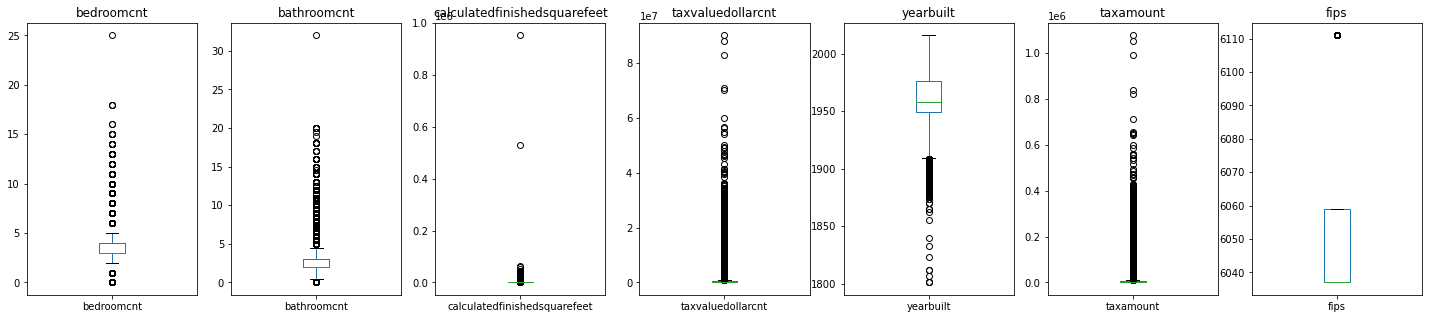

In [26]:
plt.figure(figsize=(25, 5))

for i, col in enumerate(df):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1
    
    # Create subplot.
    # plt.subplot(row X col, where?)
    plt.subplot(1,7,plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df.boxplot(column=[col])
    
    # Hide gridlines.
    plt.grid(False)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
yearbuilt,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


In [23]:
df.shape

(2140235, 7)